<a href="https://colab.research.google.com/github/AkkiAT/AT/blob/main/Customer_Flight_Satisfaction_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# **Loading Datasets**

In [36]:
df1 = pd.read_csv('/content/Flight data_Train.csv')
df2 = pd.read_csv('/content/Surveydata_Train.csv')

In [37]:
df = pd.concat([df1,df2],axis=0)

print(df.shape)
df.head()

(181834, 25)


,ID,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins,Id,...,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,149965.0,Female,Loyal Customer,65.0,Personal Travel,Eco,265.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,149966.0,Female,Loyal Customer,15.0,Personal Travel,Eco,2138.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,149967.0,Female,Loyal Customer,60.0,Personal Travel,Eco,623.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,149968.0,Female,Loyal Customer,70.0,Personal Travel,Eco,354.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,149969.0,Male,Loyal Customer,30.0,NaN,Eco,1894.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
a = df1.sort_values(by = 'ID')
b = df2.sort_values(by = 'Id')

b.reset_index(drop = True, inplace = True)
b.drop(columns = 'Id', inplace = True)

c = pd.concat([a,b],axis = 1)
print(c.shape)
c.head()

(90917, 24)


,ID,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins,Satisfaction,...,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,149965,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0.0,satisfied,...,need improvement,good,need improvement,acceptable,acceptable,extremely poor,acceptable,excellent,acceptable,need improvement
1,149966,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0.0,satisfied,...,need improvement,extremely poor,need improvement,need improvement,NaN,acceptable,good,good,good,need improvement
2,149967,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0.0,satisfied,...,acceptable,good,acceptable,poor,poor,extremely poor,poor,good,poor,acceptable
3,149968,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0.0,satisfied,...,good,acceptable,good,need improvement,need improvement,extremely poor,need improvement,good,need improvement,excellent
4,149969,Male,Loyal Customer,30,NaN,Eco,1894,0,0.0,satisfied,...,need improvement,extremely poor,need improvement,need improvement,excellent,good,excellent,excellent,good,need improvement


In [39]:
df.isnull().apply(pd.value_counts)

,ID,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins,Id,...,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
False,90917,90917,81818,90917,81829,90917,90917,90917,90633,90917,...,90917,90917,90917,90917,83738,90917,90917,90917,90917,90917
True,90917,90917,100016,90917,100005,90917,90917,90917,91201,90917,...,90917,90917,90917,90917,98096,90917,90917,90917,90917,90917


In [40]:
df.isnull().sum()

ID                                    90917
Gender                                90917
CustomerType                         100016
Age                                   90917
TypeTravel                           100005
Class                                 90917
Flight_Distance                       90917
DepartureDelayin_Mins                 90917
ArrivalDelayin_Mins                   91201
Id                                    90917
Satisfaction                          90917
Seat_comfort                          90917
Departure.Arrival.time_convenient     99161
Food_drink                            99098
Gate_location                         90917
Inflightwifi_service                  90917
Inflight_entertainment                90917
Online_support                        90917
Ease_of_Onlinebooking                 90917
Onboard_service                       98096
Leg_room_service                      90917
Baggage_handling                      90917
Checkin_service                 

In [41]:
df.isnull().apply(pd.value_counts)

,ID,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins,Id,...,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
False,90917,90917,81818,90917,81829,90917,90917,90917,90633,90917,...,90917,90917,90917,90917,83738,90917,90917,90917,90917,90917
True,90917,90917,100016,90917,100005,90917,90917,90917,91201,90917,...,90917,90917,90917,90917,98096,90917,90917,90917,90917,90917


In [42]:
df.ArrivalDelayin_Mins.fillna(df.ArrivalDelayin_Mins.mean(),inplace = True)

In [43]:
df.ArrivalDelayin_Mins.replace(0,df.ArrivalDelayin_Mins.mean(),inplace = True)

In [44]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
df['ArrivalDelayin_Mins']= imputer.fit_transform(df['ArrivalDelayin_Mins'].values.reshape(-1,1))

In [45]:
df.ArrivalDelayin_Mins.isnull().sum()

0

In [46]:
df.fillna("not_captured",inplace = True)

In [47]:
print(df.shape)

(181834, 25)


# **Follow an order based on the meanings**


1.   awful = 1
2.   unpleasant = 2
3.   decent = 3
4.   good = 4
5.   great = 5



In [48]:
df.replace({'extremely_poor': 0, 'poor': 1, 'need improvement': 2, 'acceptable': 3, 'good': 4, 'excellent': 5, 'not_captured': 2}, inplace = True)

df.replace({'very inconvinient': 0, 'inconvinient': 1, 'need improvement': 2, 'manageable': 3, 'Convienent': 4, 'very convienent': 5, }, inplace = True)

In [49]:
df['Departure.Arrival.time_convenient'].value_counts()

Departure.Arrival.time_convenient
2                 113700
4                  18840
5                  17079
3                  14806
1                  13210
extremely poor      4199
Name: count, dtype: int64

**Display Countplot of every feedback attribute with respect to Customer Satisfaction**

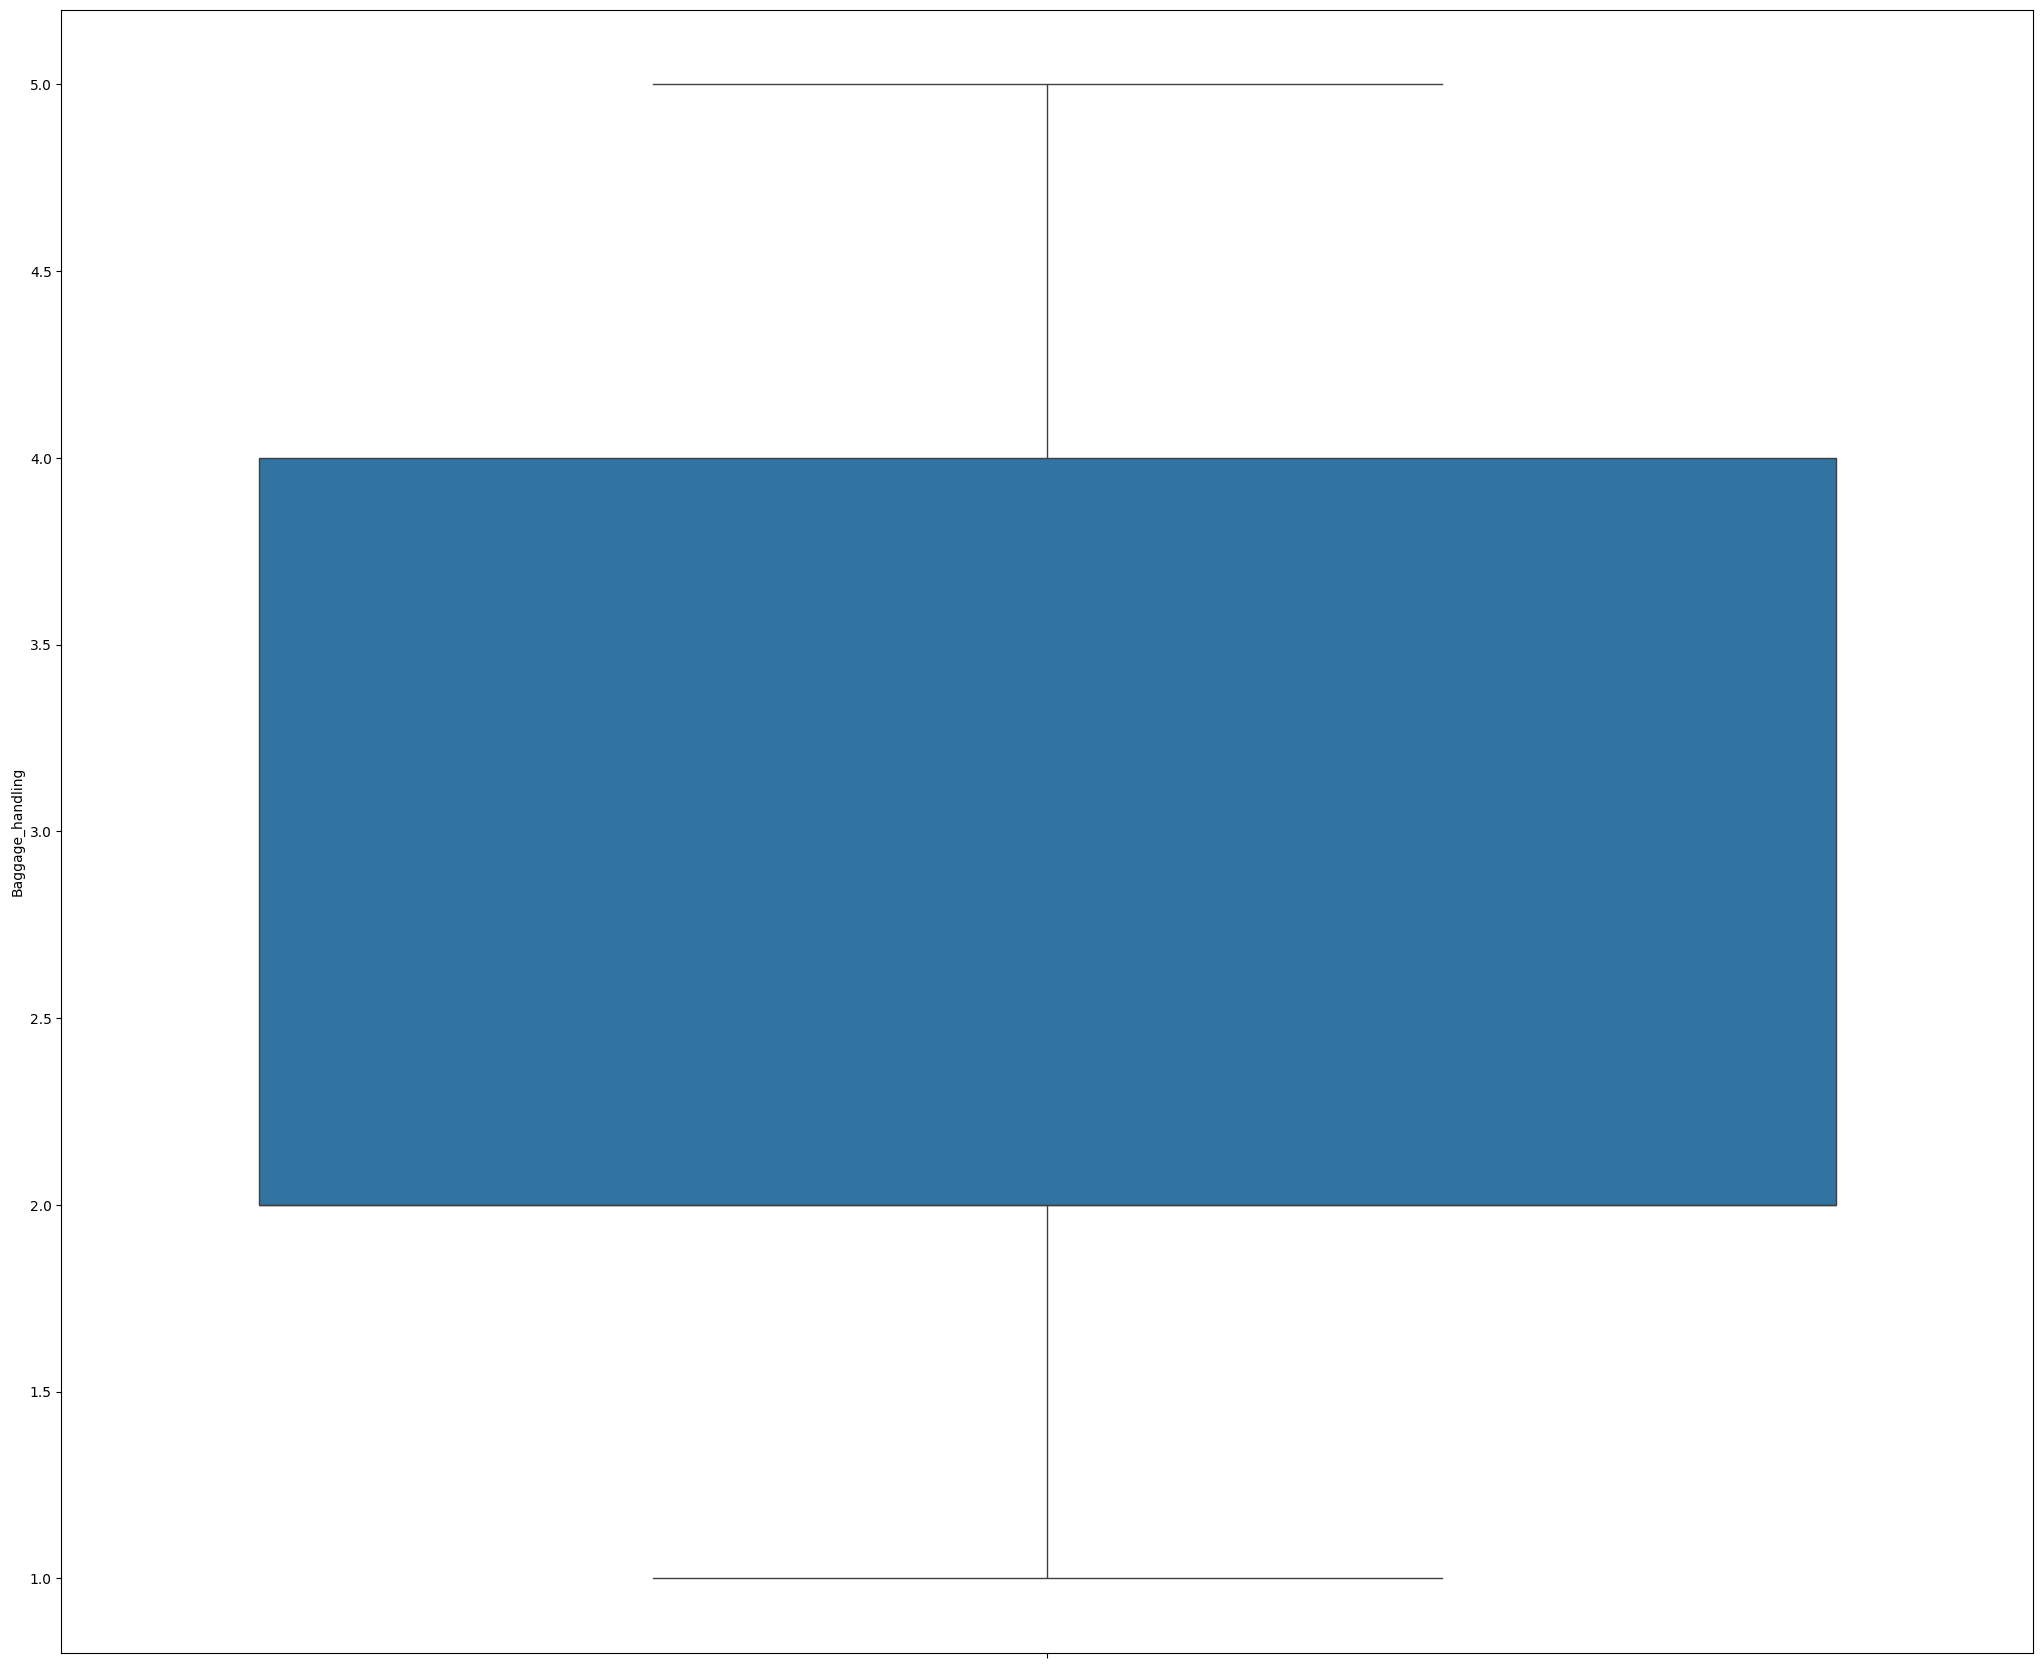

In [50]:
plt.figure(figsize=(100,50))
pos = 1
feedback = df
for i in df.columns:
  if df[i].dtype == 'int64':
    plt.subplot(3,5,pos)
    sns.boxplot(df[i])
    pos += 1
plt.tight_layout()
plt.show()

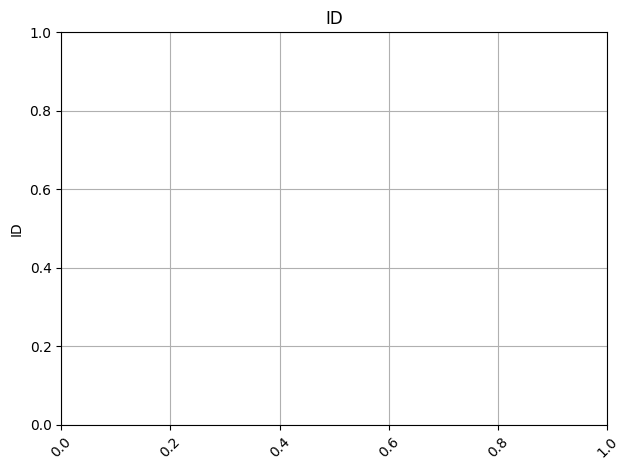

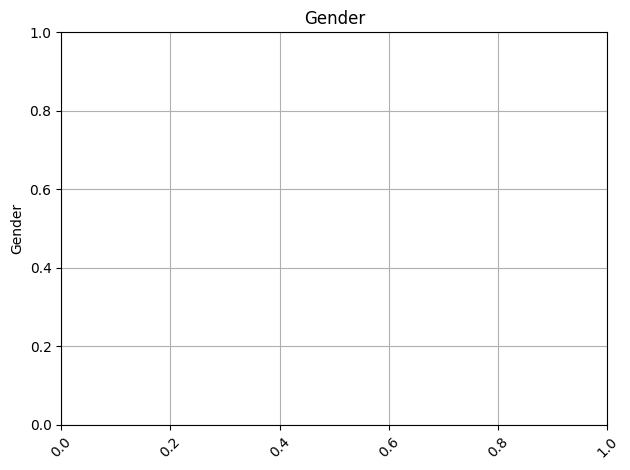

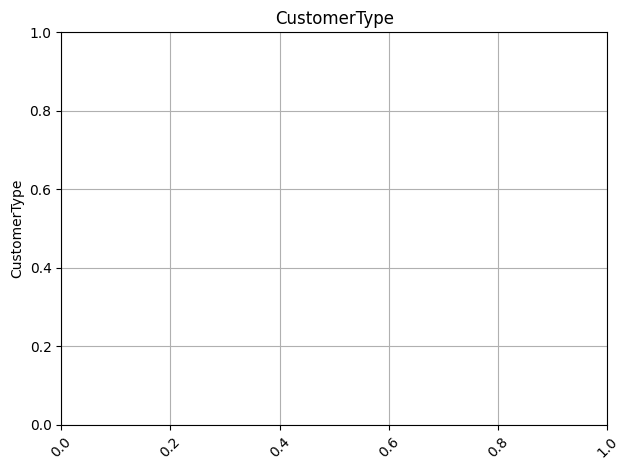

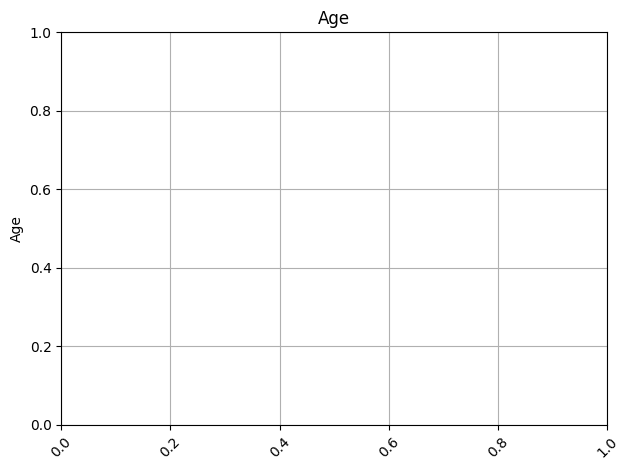

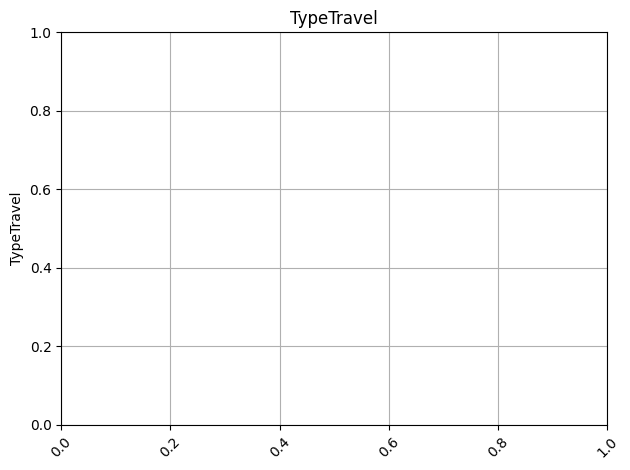

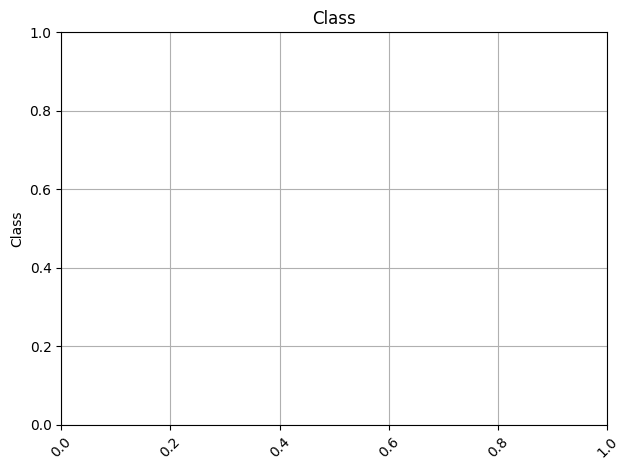

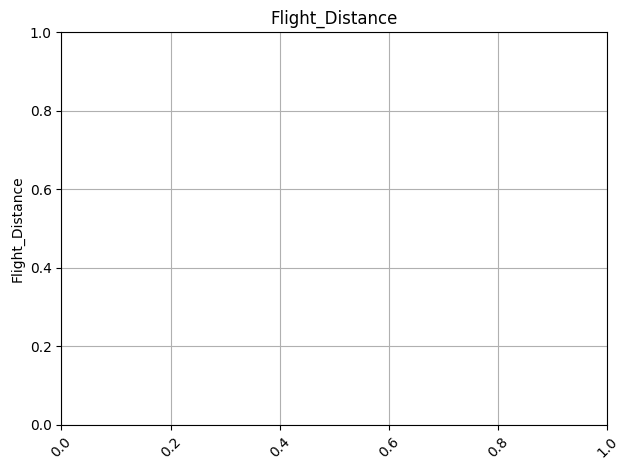

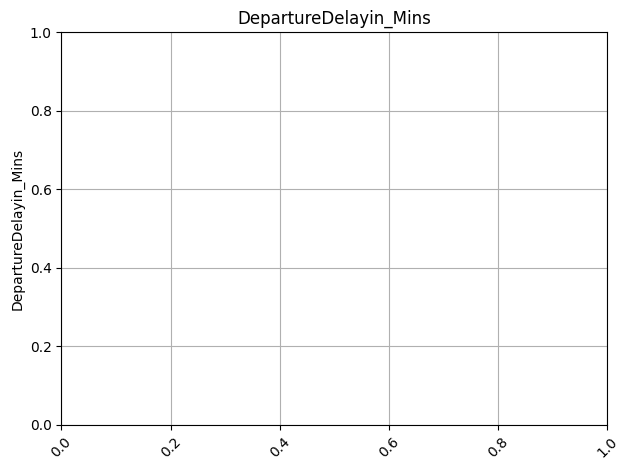

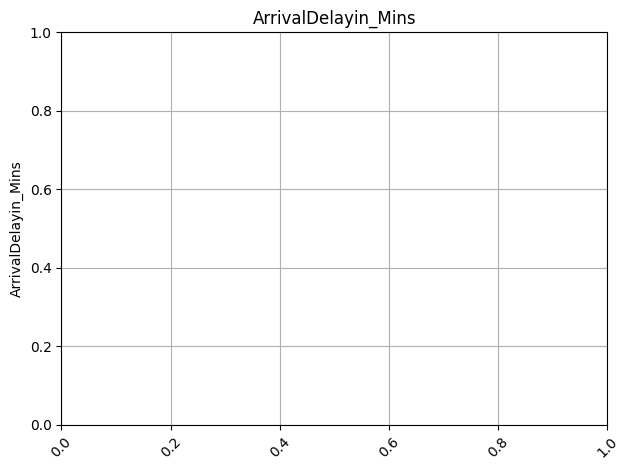

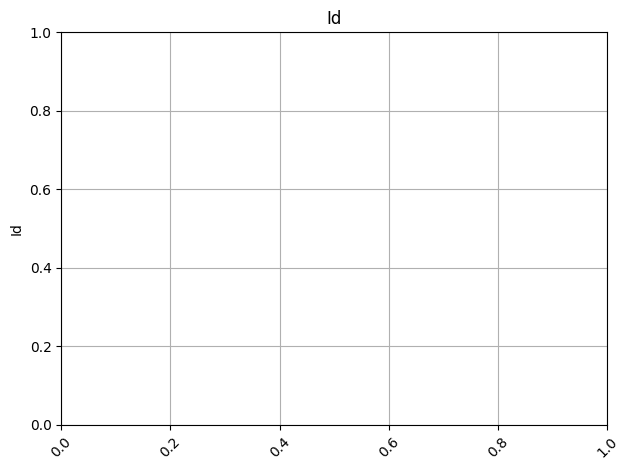

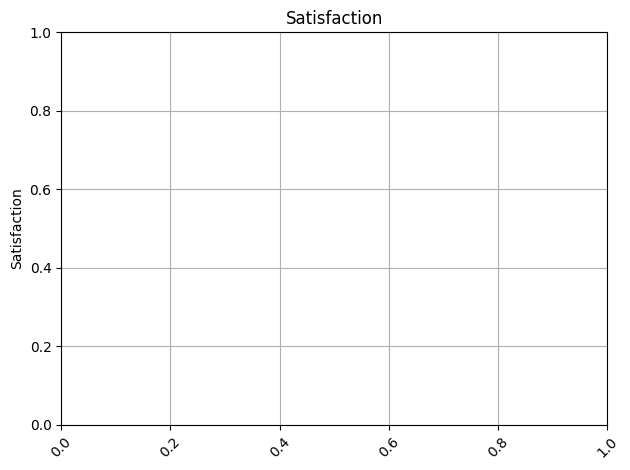

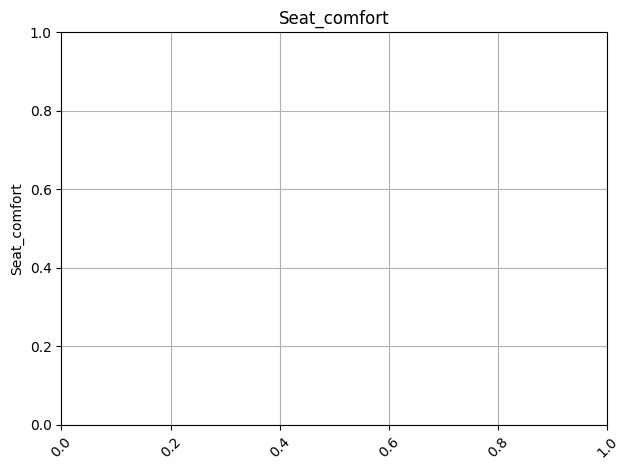

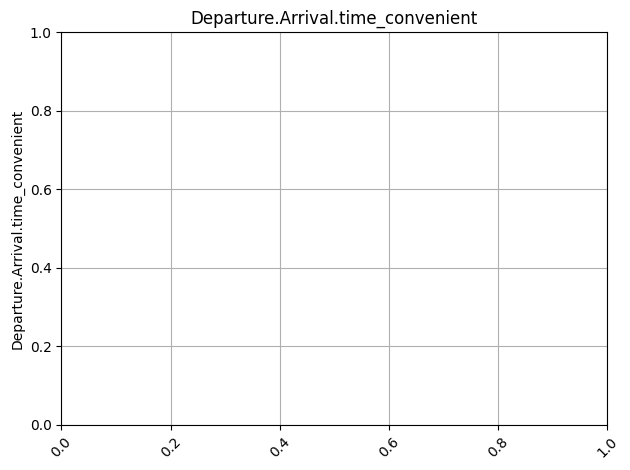

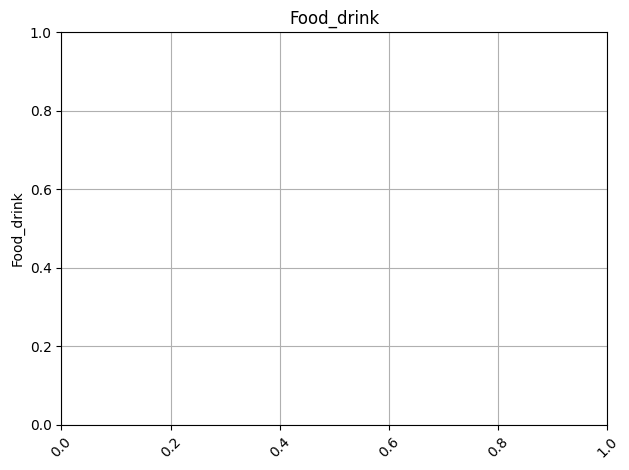

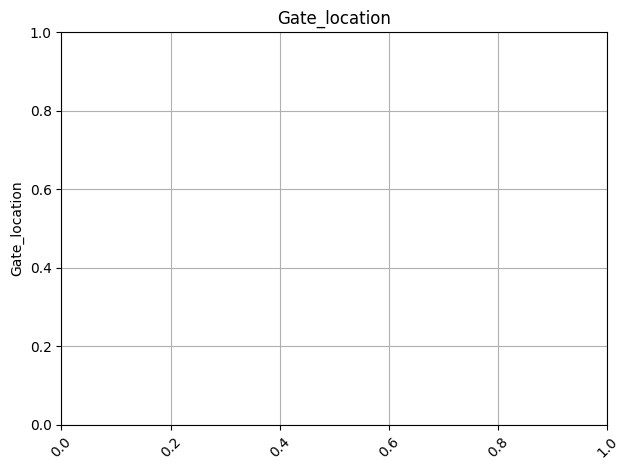

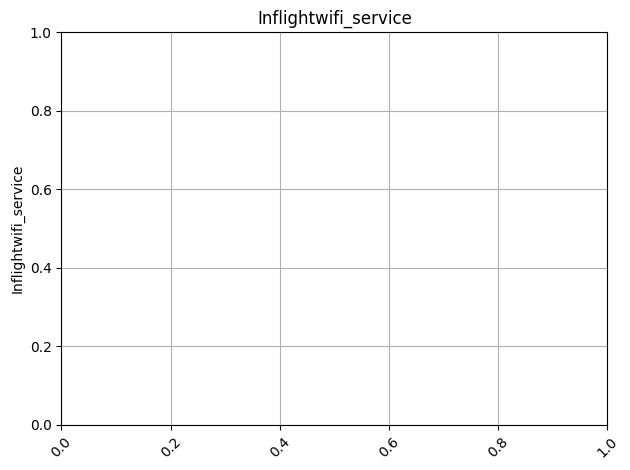

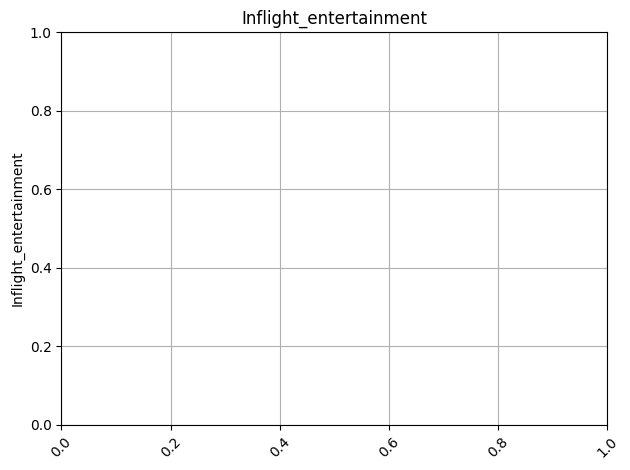

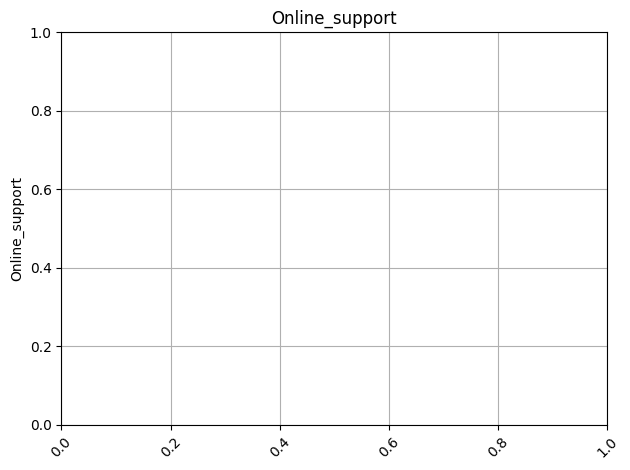

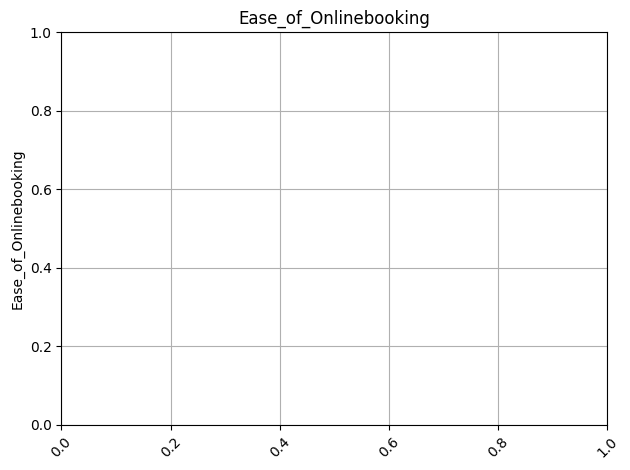

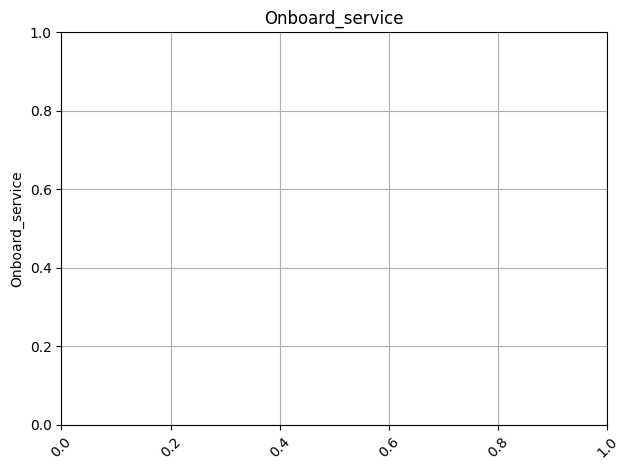

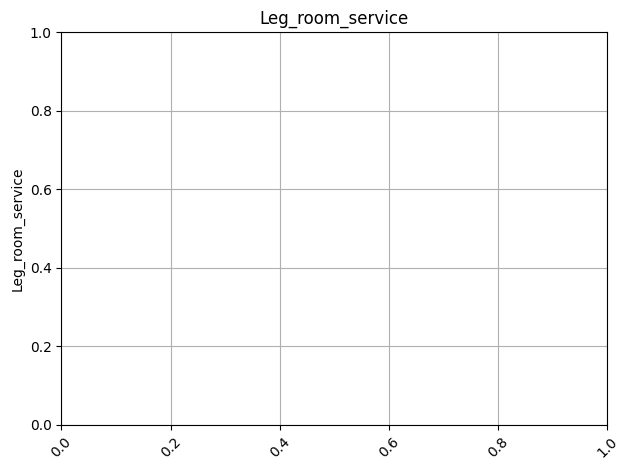

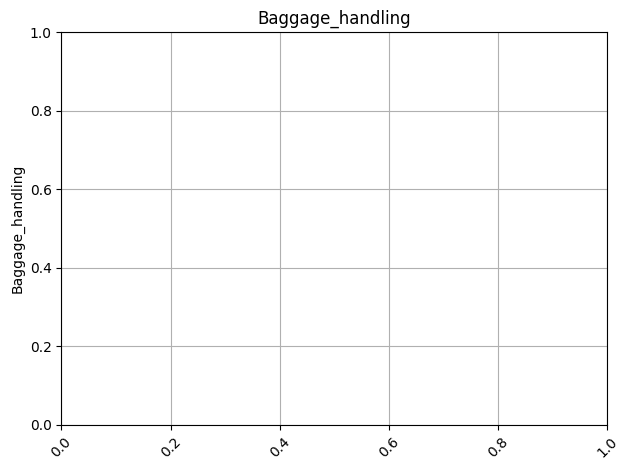

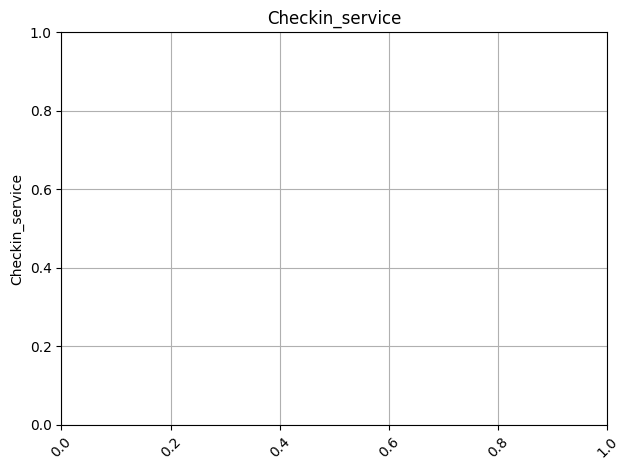

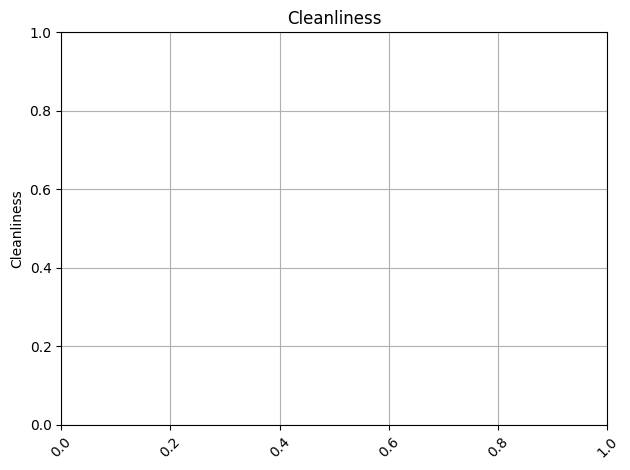

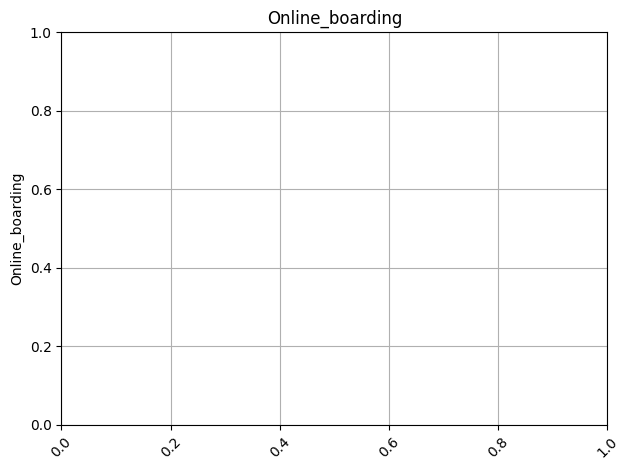

In [51]:
for i in feedback.columns:
  plt.subplot(1,1,1)

  plt.title(i)
  plt.ylabel(i)
  plt.grid(True)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.savefig(i+'.png')
  plt.savefig(i+'.svg')
  plt.savefig(i+'.pdf')
  plt.savefig(i+'.eps')
  plt.savefig(i+'.jpg')
  plt.show()


In [52]:
df.Inflight_entertainment.value_counts()

Inflight_entertainment
2                 104444
4                  29373
5                  20786
3                  16995
1                   8198
extremely poor      2038
Name: count, dtype: int64

In [53]:
entertained_and_dissatisfied = df[(df['Inflight_entertainment'] == 1) | (df['Inflight_entertainment'] == 2)]
print(entertained_and_dissatisfied.shape[0]/df.shape[0], '%')

0.6194771054918222 %


In [54]:
entertained_and_satisfied = df[(df['Inflight_entertainment'] == 3) | (df['Inflight_entertainment'] == 4) | (df['Inflight_entertainment'] == 5)]
print(entertained_and_satisfied.shape[0]/df.shape[0], '%')

0.36931486960634424 %


In [55]:
online_df = df.loc[:, ['Online_support', 'Online_boarding', 'Ease_of_Onlinebooking']]
online_df['Online_support'].value_counts()

Online_support
2                 102980
4                  29042
5                  24916
3                  15090
1                   9805
extremely poor         1
Name: count, dtype: int64

# **Model Building and Evalution**

In [56]:
for i in online_df.columns:
  if online_df[i].dtype == 'int64':
    print(i,online_df[i].value_counts().index[0])


In [57]:
df.Class.value_counts()

Class
2           90917
Business    43535
Eco         40758
Eco Plus     6624
Name: count, dtype: int64

In [58]:
df.replace({'Business': 0, 'Eco': 1, 'Eco Plus': 2}, inplace = True)

In [59]:
df_coded = pd.get_dummies(df,columns = ['Class'])

In [63]:
df_coded.columns

Index(['ID', 'Gender', 'CustomerType', 'Age', 'TypeTravel', 'Flight_Distance',
       'DepartureDelayin_Mins', 'ArrivalDelayin_Mins', 'Id', 'Satisfaction',
       'Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink',
       'Gate_location', 'Inflightwifi_service', 'Inflight_entertainment',
       'Online_support', 'Ease_of_Onlinebooking', 'Onboard_service',
       'Leg_room_service', 'Baggage_handling', 'Checkin_service',
       'Cleanliness', 'Online_boarding', 'Class_0', 'Class_1', 'Class_2'],
      dtype='object')

In [64]:
df_coded.head()

,ID,Gender,CustomerType,Age,TypeTravel,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins,Id,Satisfaction,...,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Class_0,Class_1,Class_2
0,149965.0,Female,Loyal Customer,65.0,Personal Travel,265.0,0.0,15.05893,2.0,2,...,2,2,2,2,2,2,2,False,True,False
1,149966.0,Female,Loyal Customer,15.0,Personal Travel,2138.0,0.0,15.05893,2.0,2,...,2,2,2,2,2,2,2,False,True,False
2,149967.0,Female,Loyal Customer,60.0,Personal Travel,623.0,0.0,15.05893,2.0,2,...,2,2,2,2,2,2,2,False,True,False
3,149968.0,Female,Loyal Customer,70.0,Personal Travel,354.0,0.0,15.05893,2.0,2,...,2,2,2,2,2,2,2,False,True,False
4,149969.0,Male,Loyal Customer,30.0,2,1894.0,0.0,15.05893,2.0,2,...,2,2,2,2,2,2,2,False,True,False


In [3]:
df_coded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90917 entries, 0 to 90916
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     90917 non-null  int64  
 1   Gender                 90917 non-null  object 
 2   CustomerType           81818 non-null  object 
 3   Age                    90917 non-null  int64  
 4   TypeTravel             81829 non-null  object 
 5   Flight_Distance        90917 non-null  float64
 6   DepartureDelayin_Mins  90917 non-null  float64
 7   ArrivalDelayin_Mins    90633 non-null  float64
 8   Class_0                90917 non-null  bool   
 9   Class_1                90917 non-null  bool   
 10  Class_2                90917 non-null  bool   
dtypes: bool(3), float64(3), int64(2), object(3)
memory usage: 5.8+ MB


In [4]:
df_coded.describe()

,ID,Age,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
count,90917.000000,90917.000000,9.091700e+04,9.091700e+04,9.063300e+04
mean,195423.000000,39.447166,1.104301e-16,6.252232e-19,1.567956e-17
std,26245.621549,15.129794,1.000005e+00,1.000005e+00,1.000006e+00
min,149965.000000,7.000000,-1.881260e+00,-3.798023e-01,-3.857475e-01
25%,172694.000000,27.000000,-6.054198e-01,-3.798023e-01,-3.857475e-01
50%,195423.000000,40.000000,-5.320492e-02,-3.798023e-01,-3.857475e-01
75%,218152.000000,51.000000,5.457583e-01,-6.947658e-02,-5.274127e-02
max,240881.000000,85.000000,4.838815e+00,4.079008e+01,4.018978e+01


**Create train and test datasets**

In [10]:
df = df_coded

In [11]:
df.columns

Index(['ID', 'Gender', 'CustomerType', 'Age', 'TypeTravel', 'Flight_Distance',
       'DepartureDelayin_Mins', 'ArrivalDelayin_Mins', 'Class_0', 'Class_1',
       'Class_2'],
      dtype='object')

In [16]:
to_drop = ['ID', 'Gender', 'CustomerType', 'TypeTravel', 'Class_0', 'Class_1', 'Class_2']

In [18]:
X = df.drop(to_drop, axis=1)

y = df['Class_2']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
y_train.value_counts()

Class_2
False    56485
True      4429
Name: count, dtype: int64

In [22]:
y_test.value_counts()

Class_2
False    27808
True      2195
Name: count, dtype: int64

In [23]:
X_train.shape

(60914, 4)

In [24]:
X_train.dtypes

Age                        int64
Flight_Distance          float64
DepartureDelayin_Mins    float64
ArrivalDelayin_Mins      float64
dtype: object

**Logistics Regression**

In [26]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Fit the LogisticRegression model with the imputed data
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
score1 = lr.score(X_test, y_test)
score1

0.9268406492684065

In [27]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgbc = HistGradientBoostingClassifier()

hgbc.fit(X_train, y_train)
pred = hgbc.predict(X_test)
score1 = hgbc.score(X_test, y_test)
score1

0.9268406492684065

In [29]:
feedback = 'Class_2'

In [31]:
# Check the spelling of the column name
print(X.columns)

# Verify that the correct data has been loaded
print(X.head())

# Choose a different column to use for the analysis
X_train, X_test, y_train, y_test = train_test_split(X.loc[:, 'Age'], y, random_state=1, stratify=y)

Index(['Age', 'Flight_Distance', 'DepartureDelayin_Mins',
       'ArrivalDelayin_Mins'],
      dtype='object')
   Age  Flight_Distance  DepartureDelayin_Mins  ArrivalDelayin_Mins
0   65        -1.671866              -0.379802            -0.385748
1   15         0.152293              -0.379802            -0.385748
2   60        -1.323202              -0.379802            -0.385748
3   70        -1.585187              -0.379802            -0.385748
4   30        -0.085344              -0.379802            -0.385748


**Decisison Tree**

In [35]:
import pandas as pd

X.isna().sum()

Age                        0
Flight_Distance            0
DepartureDelayin_Mins      0
ArrivalDelayin_Mins      284
dtype: int64

In [38]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgbc = HistGradientBoostingClassifier()
hgbc.fit(X_train, y_train)
pred = hgbc.predict(X_test)
score1 = hgbc.score(X_test, y_test)
score1

0.9272767267927848

In [40]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

In [41]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgbc = HistGradientBoostingClassifier()
hgbc.fit(X_train, y_train)
pred = hgbc.predict(X_test)
score1 = hgbc.score(X_test, y_test)

In [43]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
score1 = dt.score(X_test, y_test)
pred = dt.predict(X_test)
score1

0.8647602287725473

**Random Forest**

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
score1 = rf.score(X_test, y_test)
pred = rf.predict(X_test)
score1

0.9104707435107787

In [45]:
pd.Series(pred).value_counts()

False    22270
True       460
Name: count, dtype: int64

In [52]:
data = {'Technique': ['HistGradientBoostingClassifier', 'RandomForestClassifier', 'DecisionTreeClassifier'],}
results = pd.DataFrame(data)

In [54]:
results

,Technique
0,HistGradientBoostingClassifier
1,RandomForestClassifier
2,DecisionTreeClassifier


In [60]:
# Reduce the number of components to a value less than or equal to 2
pca = PCA(n_components=2)

# Fit the PCA model to the training data
pca.fit(X_train)

PCA(n_components=2)

In [61]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca.shape, X_test_pca.shape

((68187, 2), (22730, 2))

In [62]:
pca.explained_variance_ratio_

array([0.99150507, 0.00849493])

In [63]:
result = pd.DataFrame(X_train_pca)
result

,0,1
0,15.549682,-0.442036
1,24.550619,-0.289356
2,-19.440102,-0.598019
3,-0.452180,-0.151894
4,9.578935,-0.712235
...,...,...
68182,-9.437597,-0.601466
68183,4.587031,-0.757243
68184,3.578672,-0.703129
68185,26.558478,-0.499303


In [68]:
# Import the SVC class from the sklearn.svm module
from sklearn.svm import SVC

# Define the classifier object
clf = SVC()

# Fit the classifier on the training data
clf.fit(X_train_pca, y_train)

# Calculate the score on the test data
score = clf.score(X_test_pca, y_test)

print(f"Classifier score: {score}")

Classifier score: 0.9272767267927848


In [69]:
# Define the classifier object
clf = SVC()

# Fit the classifier on the training data
clf.fit(X_train_pca, y_train)

# Calculate the score on the test data
score = clf.score(X_test_pca, y_test)

print(f"Classifier score: {score}")

Classifier score: 0.9272767267927848


In [70]:
clf.score(X_test_pca, y_test)

0.9272767267927848